In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_csv("data/online_gaming_behavior_dataset.csv")

# Display some rows to ensure data has loaded
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [4]:
# Display some basic features
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [5]:
# Display stats of dataset
df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [6]:
# Check for null/duplicate values

print("Null values in each column:\n")
print(df.isnull().sum())
print("\n")
print("Duplicate values in the dataset:", df.duplicated().sum())

Null values in each column:

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64


Duplicate values in the dataset: 0


In [7]:
# Display count of unique values in each column 
print("Unique values in each column:\n")
df.nunique()

Unique values in each column:



PlayerID                     40034
Age                             35
Gender                           2
Location                         4
GameGenre                        5
PlayTimeHours                40034
InGamePurchases                  2
GameDifficulty                   3
SessionsPerWeek                 20
AvgSessionDurationMinutes      170
PlayerLevel                     99
AchievementsUnlocked            50
EngagementLevel                  3
dtype: int64

In [8]:
# we see that the InGamePurchases is actually categorical (has only 2 unique values) despite having numerical values
# so lets fix that
df["InGamePurchases"] = df["InGamePurchases"].astype("category")

In [9]:
# Data distribution

print("Categorical columns:\n")
display(df.select_dtypes(include=["object", "category"]).columns.tolist())

print("\nNumerical columns:\n")
display(df.select_dtypes(include=["float64", "int64"]).columns.tolist())

Categorical columns:



['Gender',
 'Location',
 'GameGenre',
 'InGamePurchases',
 'GameDifficulty',
 'EngagementLevel']


Numerical columns:



['PlayerID',
 'Age',
 'PlayTimeHours',
 'SessionsPerWeek',
 'AvgSessionDurationMinutes',
 'PlayerLevel',
 'AchievementsUnlocked']

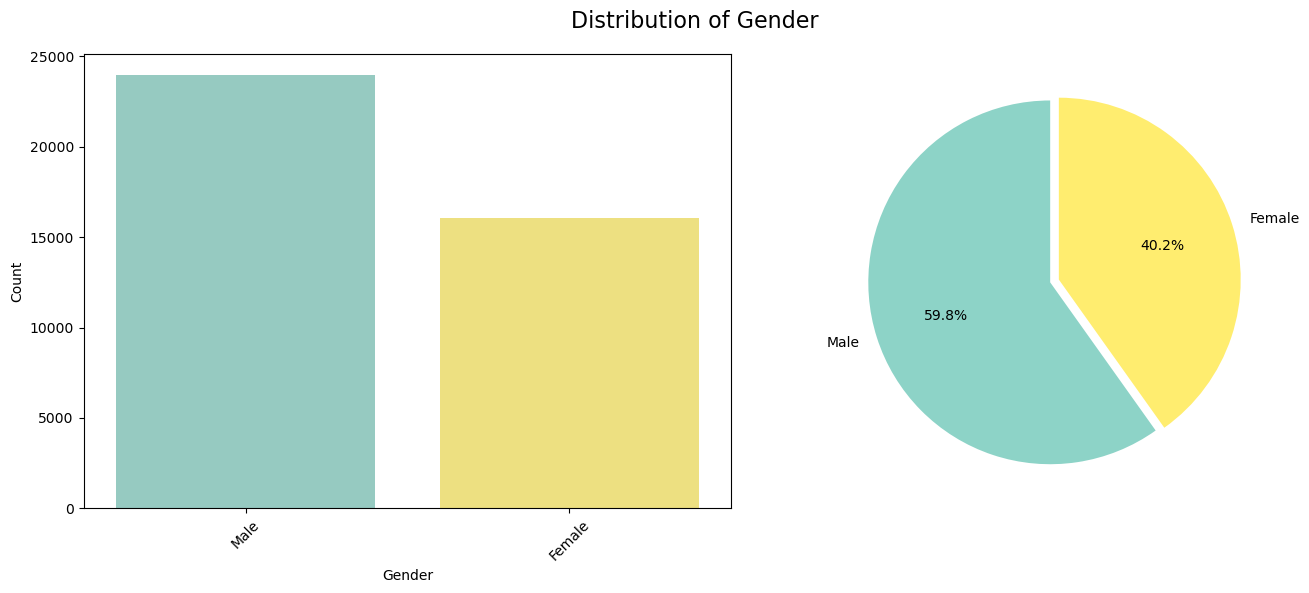

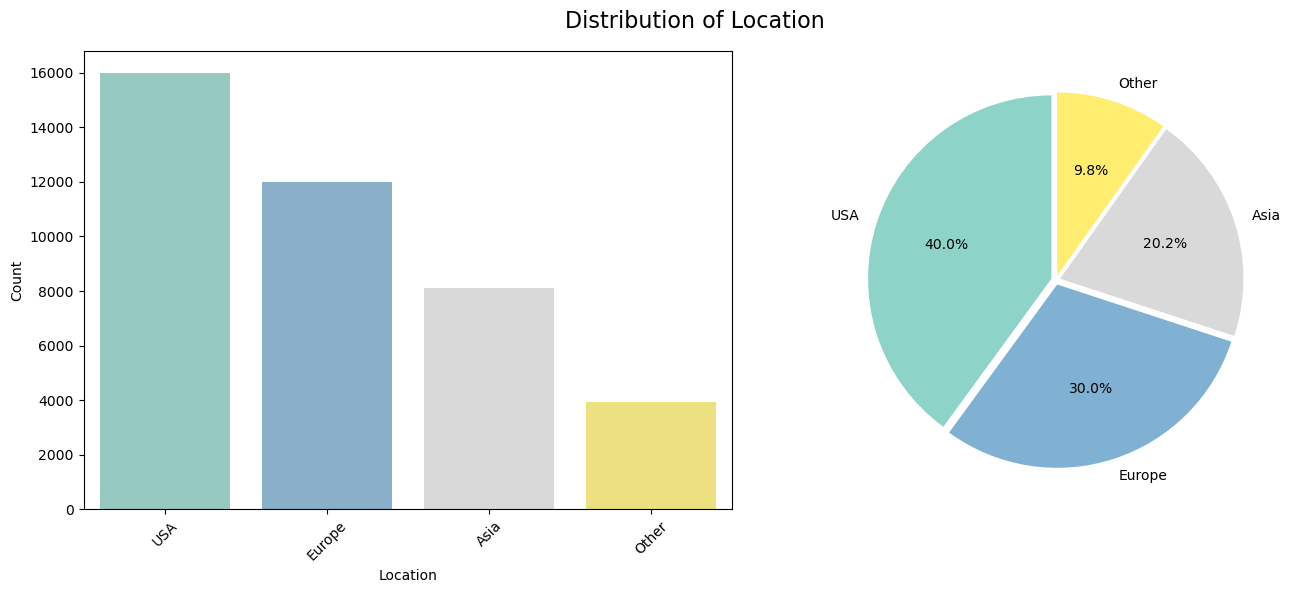

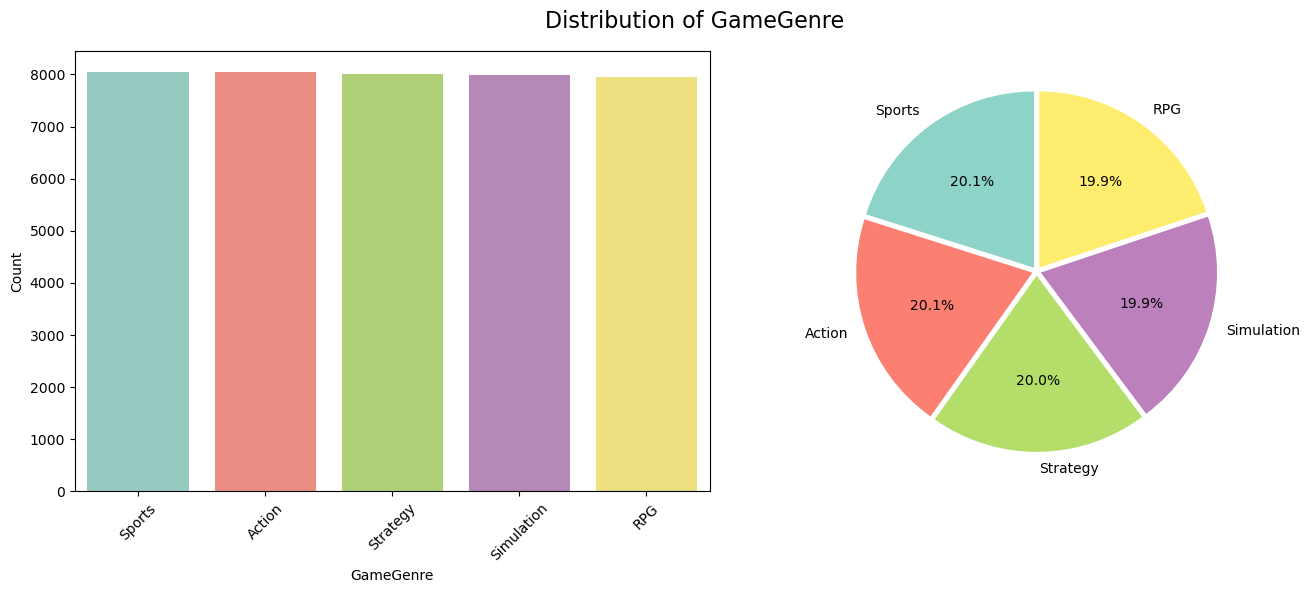

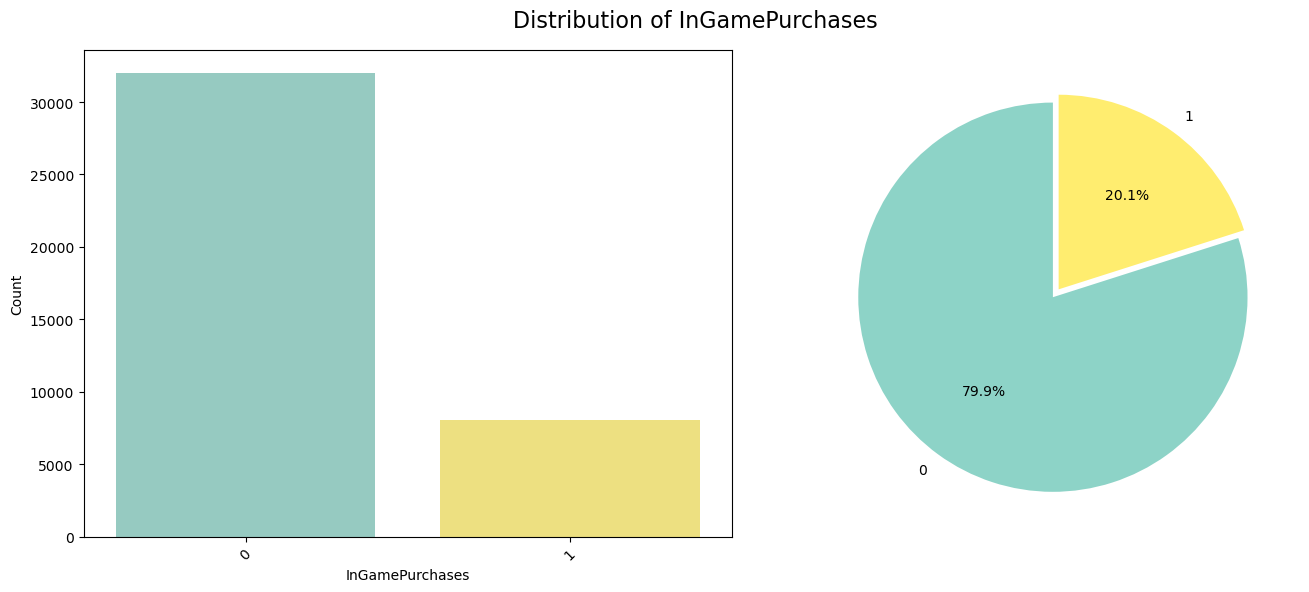

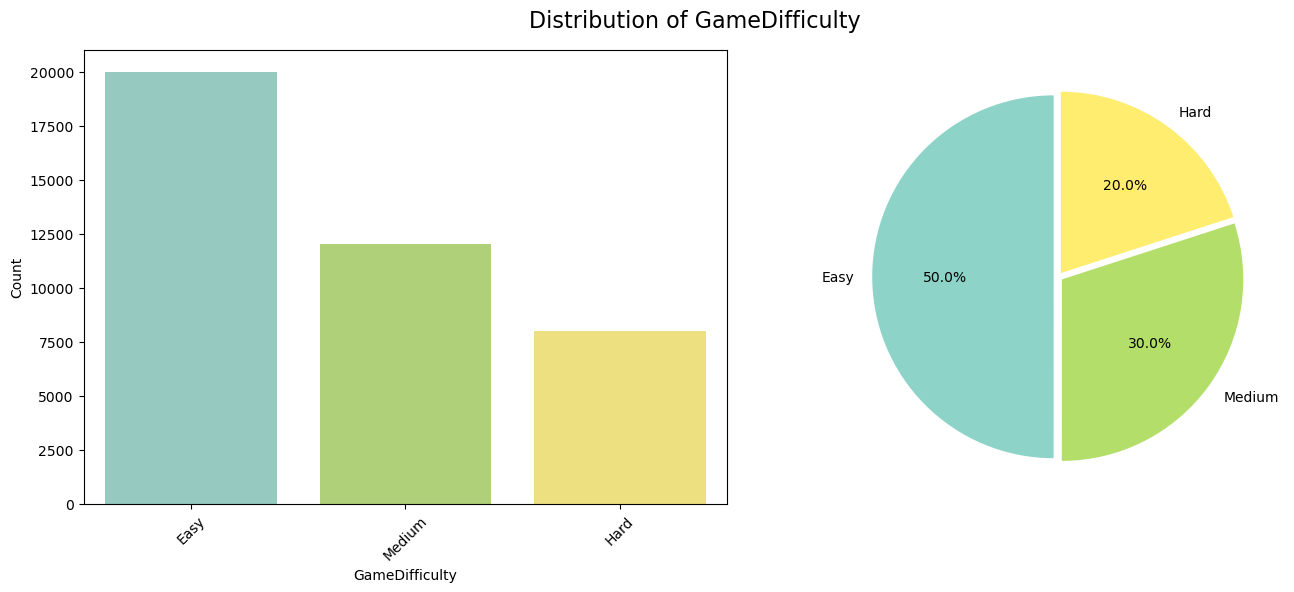

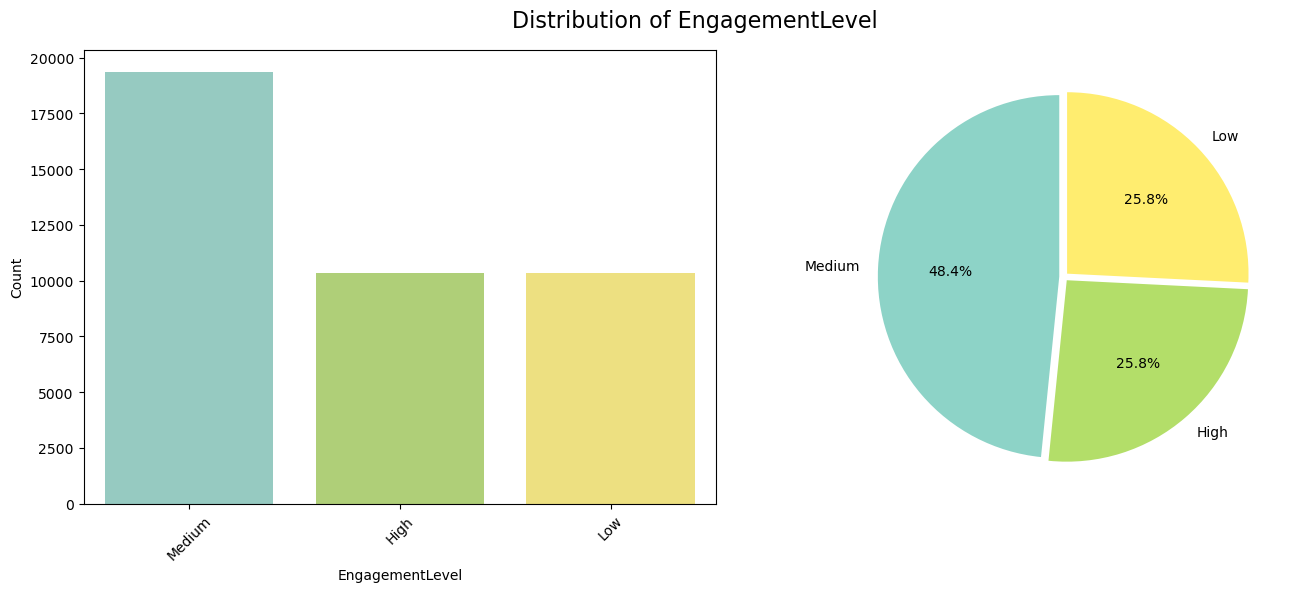

In [10]:
# Plot unique values of Categorical Column

def visualize_unique_categories(categorical_column_name, data):

    # Fetch unique combinations of column and set colors
    value_counts = data[categorical_column_name].value_counts()
    colors = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f"Distribution of {categorical_column_name}", fontsize=16)

    # Bar chart
    sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, ax=axes[0])
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    axes[0].set_xlabel(categorical_column_name)
    axes[0].set_ylabel("Count")

    # Pie chart
    axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors, explode=[0.025]*data[categorical_column_name].nunique(), startangle=90)

    plt.tight_layout()
    plt.show()

categorical_columns = ["Gender", "Location", "GameGenre", "InGamePurchases", "GameDifficulty", "EngagementLevel"]

for category in categorical_columns:
    visualize_unique_categories(category, df)

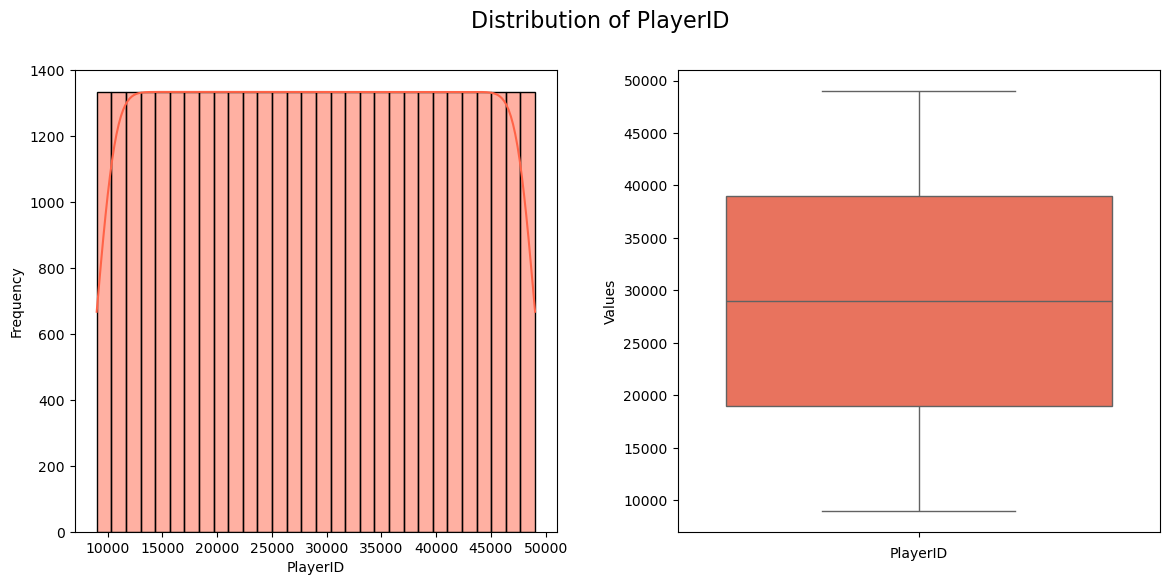

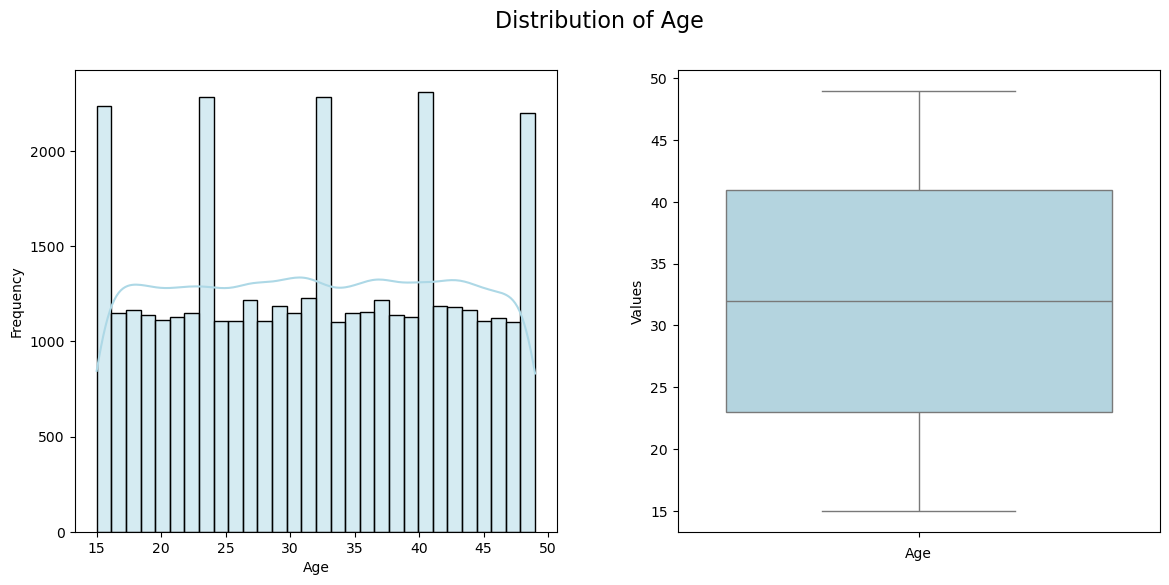

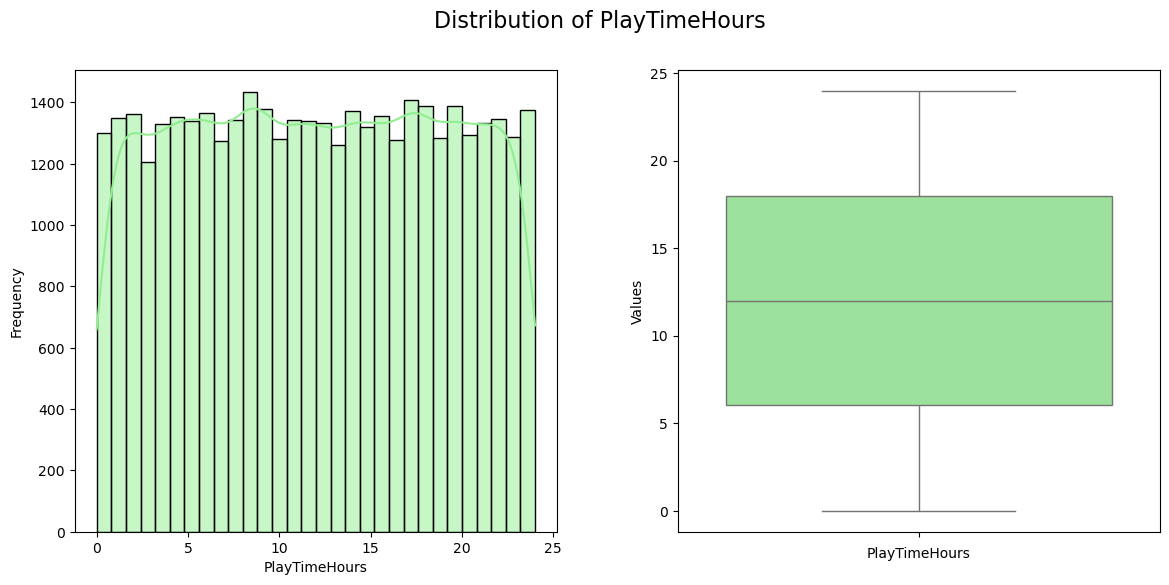

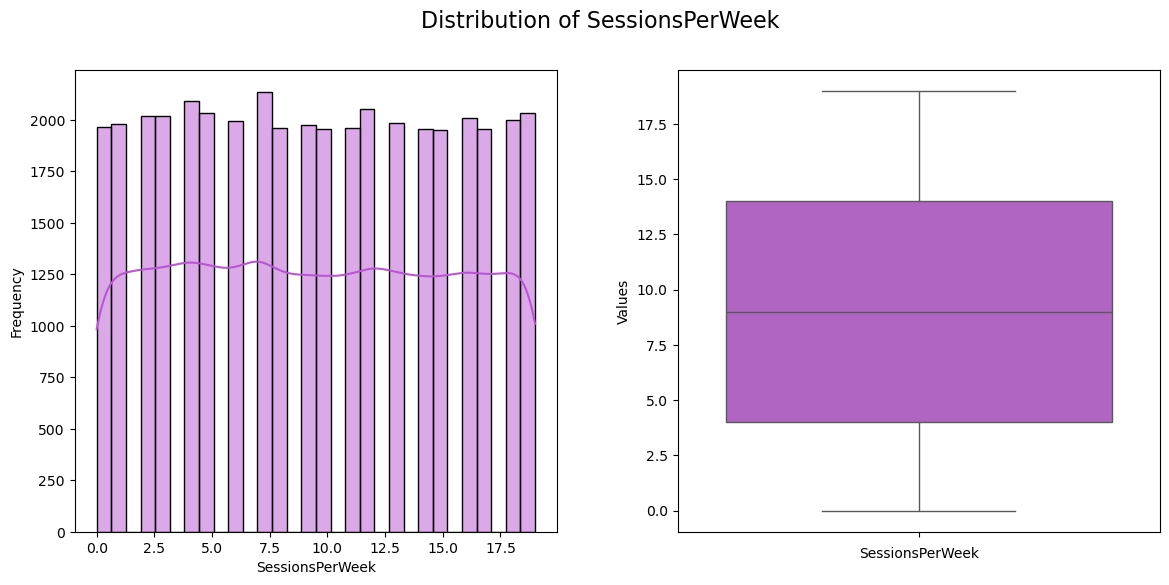

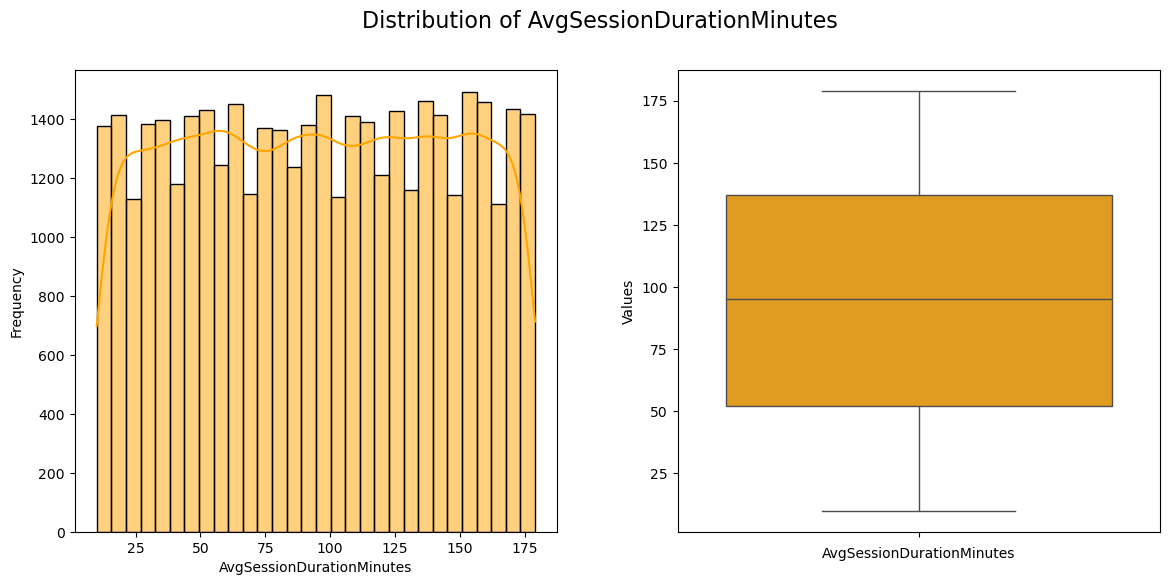

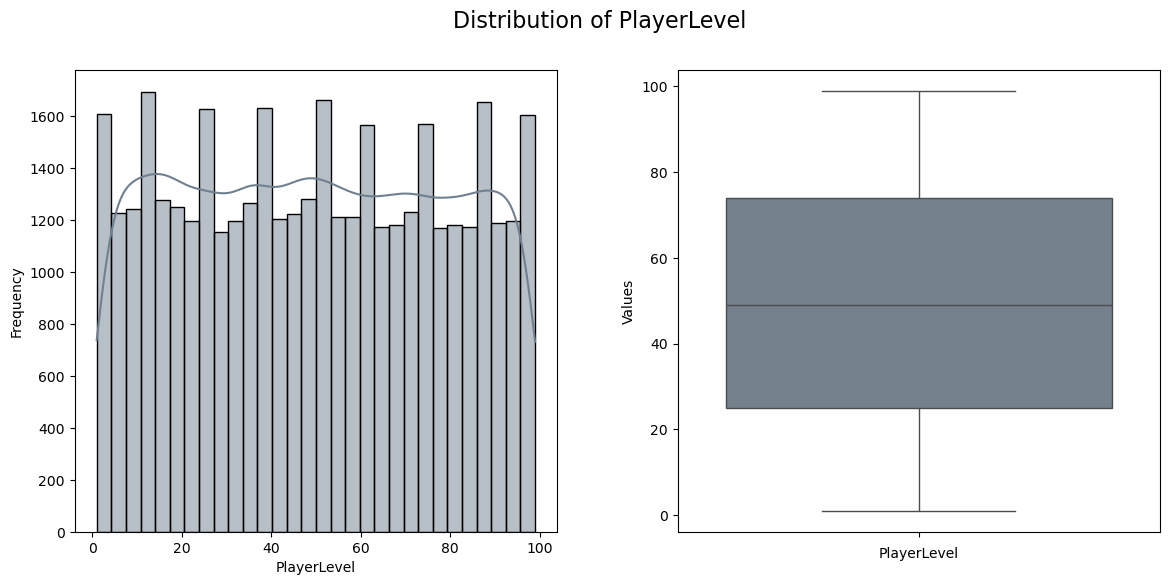

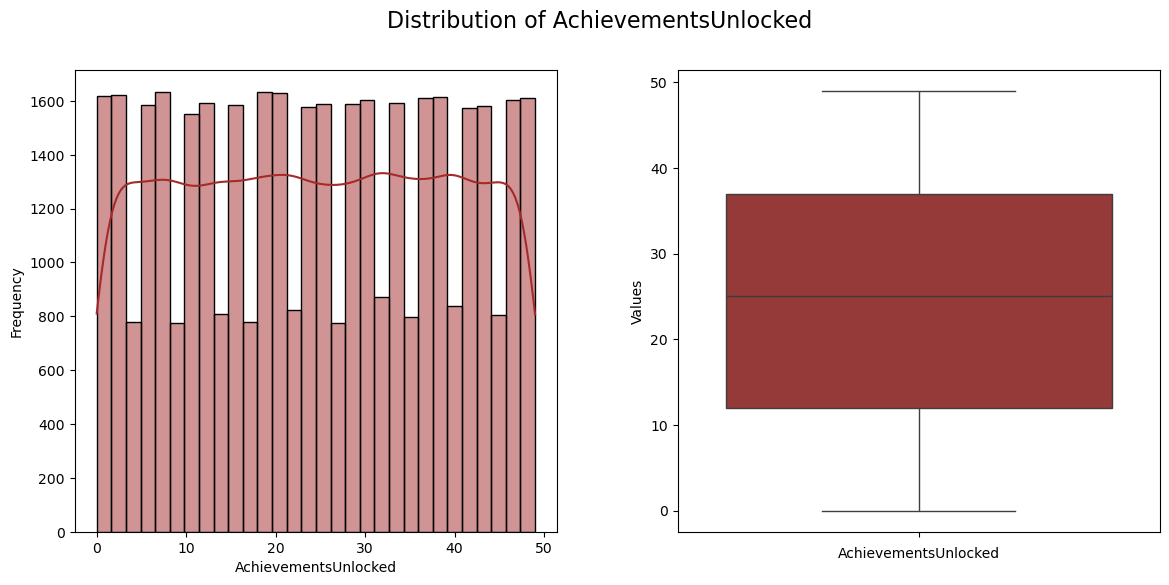

In [11]:
# Plot values of numerical columns

def visualize_numerical_columns(numerical_column_name, data, index):

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw = {"wspace": 0.25})
    fig.suptitle(f"Distribution of {numerical_column_name}", fontsize=16)

    # histogram for each column to show the distribution of different frequencies
    sns.histplot(data[numerical_column_name], bins = 30, kde = True, ax = axes[0], color=colors[index])
    axes[0].set_ylabel("Frequency")

    # box-plot to detect outliers
    sns.boxplot(data[numerical_column_name], color=colors[index], ax=axes[1])
    axes[1].set_ylabel("Values")
    axes[1].set_xlabel(numerical_column_name)

numerical_columns = ['PlayerID',
 'Age',
 'PlayTimeHours',
 'SessionsPerWeek',
 'AvgSessionDurationMinutes',
 'PlayerLevel',
 'AchievementsUnlocked']

colors = ["tomato", "lightblue", "lightgreen", "mediumorchid", "orange", "slategray", "brown"]

for i, num_col in enumerate(numerical_columns):
    visualize_numerical_columns(num_col, df, i)

plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()

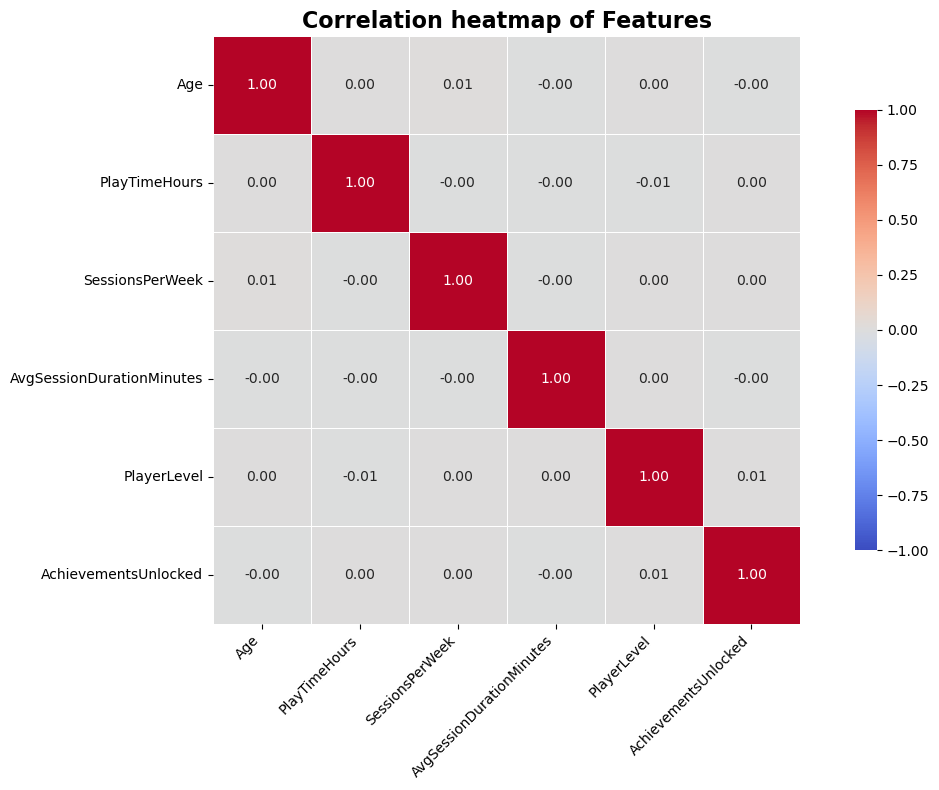

In [12]:
# Feature correlation

plt.figure(figsize=(12, 8))

# Pearson correlation only works with numerical features
# PlayerID is unique to each row and its correlation with other features won't lead to any interesting insights
# So lets drop categorical columns & PlayerID, and create a correlation matrix with the rest of the features
corr_matrix = df.drop(columns = ["PlayerID", "Gender", "Location", "GameGenre", "InGamePurchases", "GameDifficulty", "EngagementLevel"]).corr()

ax = sns.heatmap(
    corr_matrix,
    vmin=-1, 
    vmax=1,
    center=0,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment="right",
    fontsize=10,
)

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment="right",
    fontsize=10,
)

plt.title("Correlation heatmap of Features", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

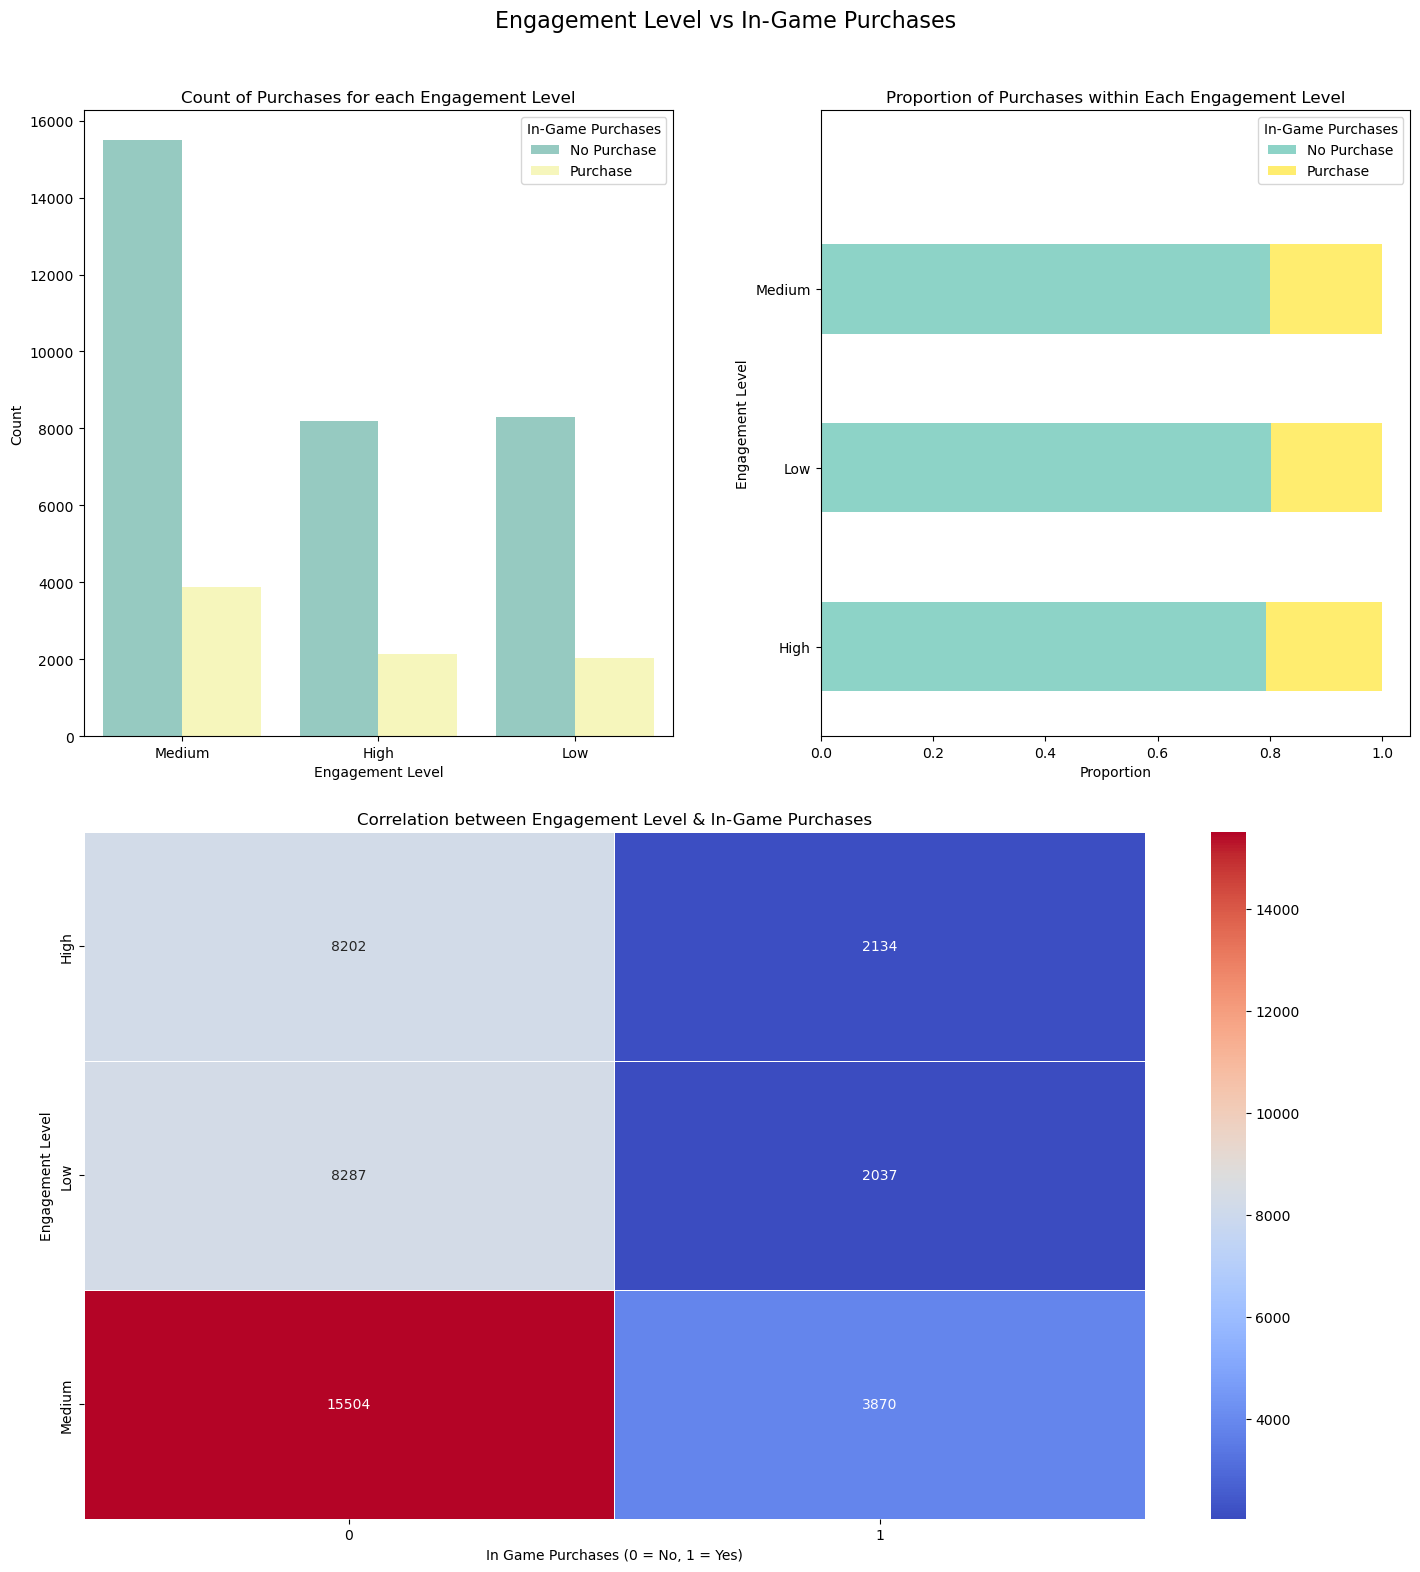

In [13]:
# Relationship between InGamePurchases and Engagement

# Numerical comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 16), gridspec_kw = {"wspace": 0.25, "hspace": 0.25})
fig.suptitle("Engagement Level vs In-Game Purchases", fontsize=16)

sns.countplot(data=df, x="EngagementLevel", hue="InGamePurchases", palette="Set3", ax=axes[0, 0])

axes[0, 0].set_xlabel("Engagement Level")
axes[0, 0].set_ylabel("Count")
axes[0, 0].set_title("Count of Purchases for each Engagement Level")
axes[0, 0].legend(title="In-Game Purchases", labels=["No Purchase", "Purchase"])

# Proportional comparison
engagement_purchase_counts = df.groupby("EngagementLevel")["InGamePurchases"].value_counts(normalize=True).unstack()
engagement_purchase_counts.plot(kind="barh", stacked=True, colormap="Set3", ax=axes[0, 1], width=0.5)

axes[0, 1].set_xlabel("Proportion")
axes[0, 1].tick_params(axis="x", rotation=0)
axes[0, 1].set_ylabel("Engagement Level")
axes[0, 1].set_title("Proportion of Purchases within Each Engagement Level")
axes[0, 1].set_ylim(-0.5, len(engagement_purchase_counts))
axes[0, 1].legend(title="In-Game Purchases", labels=["No Purchase", "Purchase"], loc="upper right")

# Correlation visualization
# heatmap
heatmap_data = df.pivot_table(index = "EngagementLevel", columns = "InGamePurchases", aggfunc = "size", fill_value = 0)
ax_heatmap = fig.add_subplot(2, 1, 2)

sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5, ax=ax_heatmap)

ax_heatmap.set_xlabel("In Game Purchases (0 = No, 1 = Yes)")
ax_heatmap.set_ylabel("Engagement Level")
ax_heatmap.set_title("Correlation between Engagement Level & In-Game Purchases")

fig.delaxes(axes[1, 1])
fig.delaxes(axes[1, 0])
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

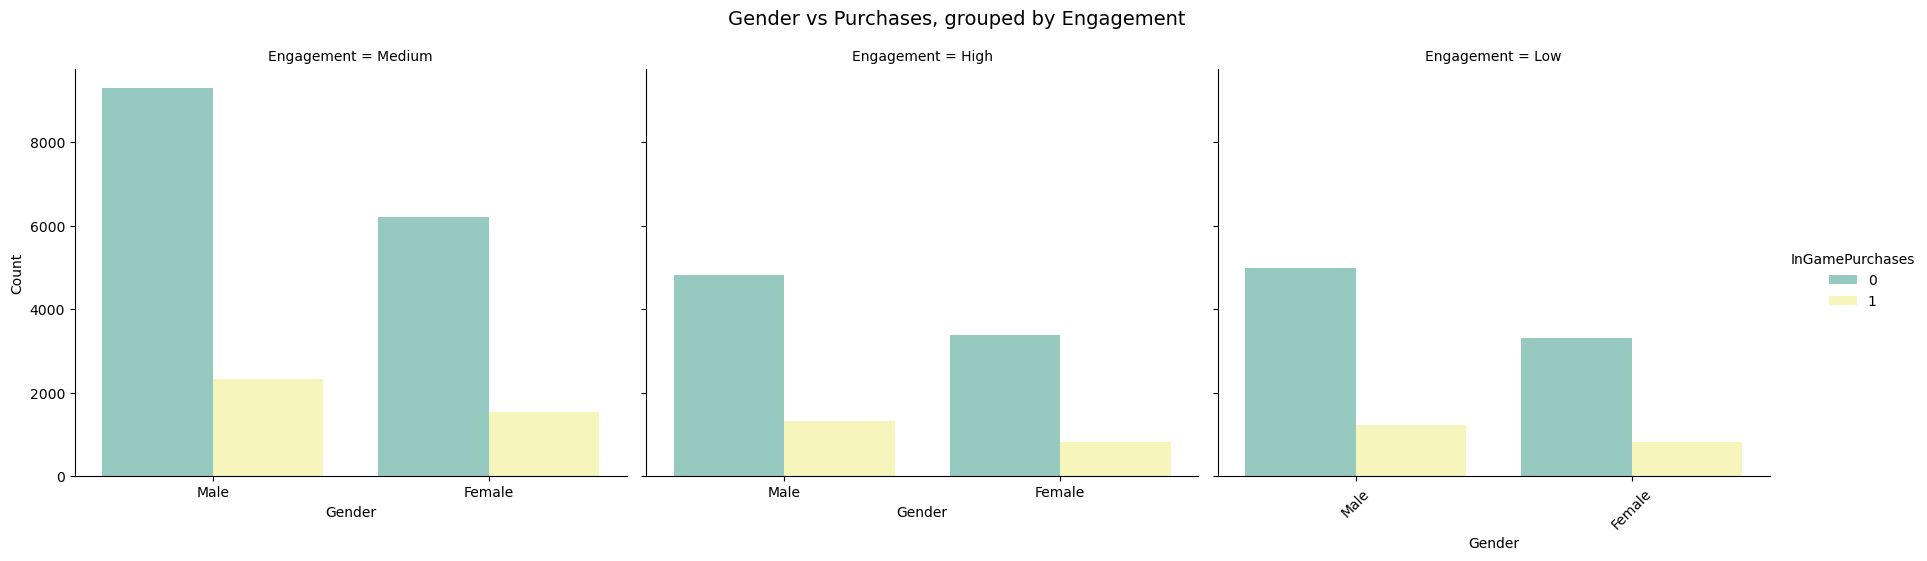

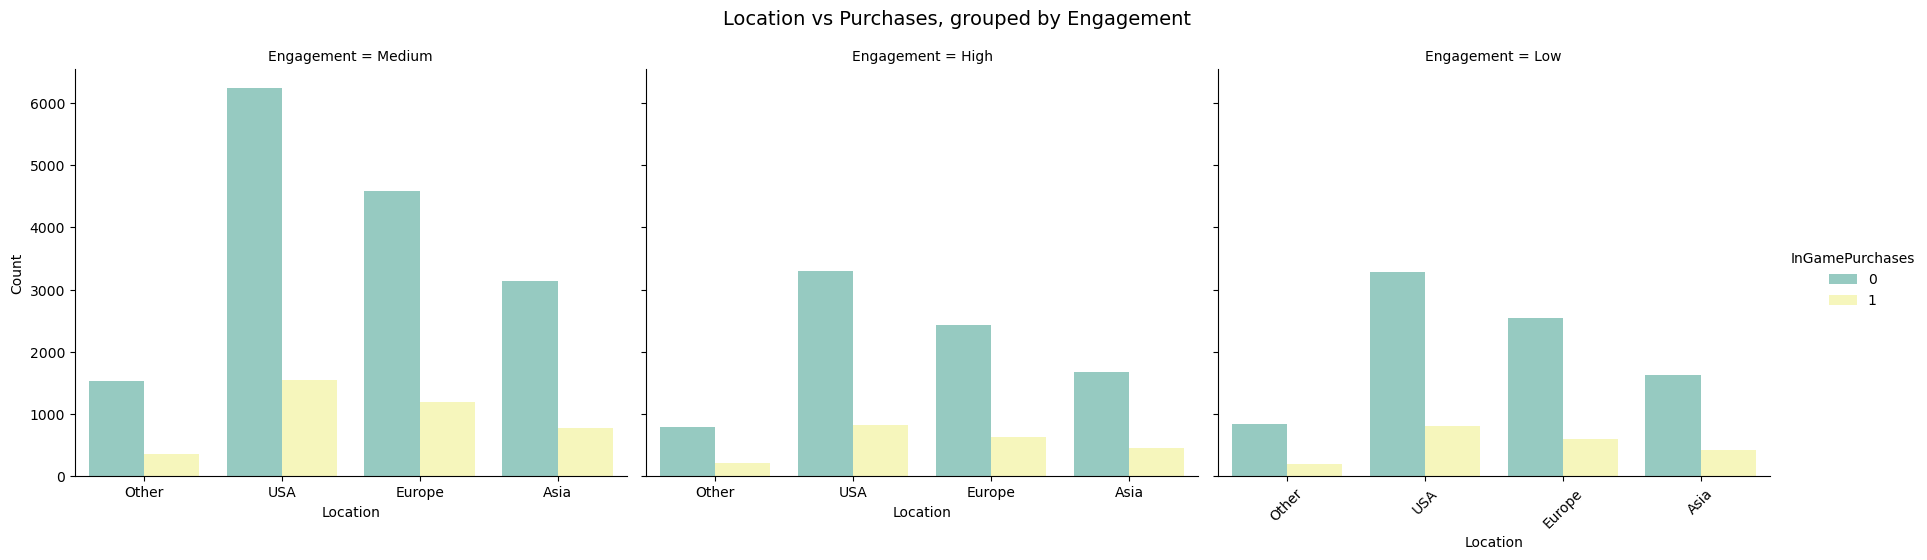

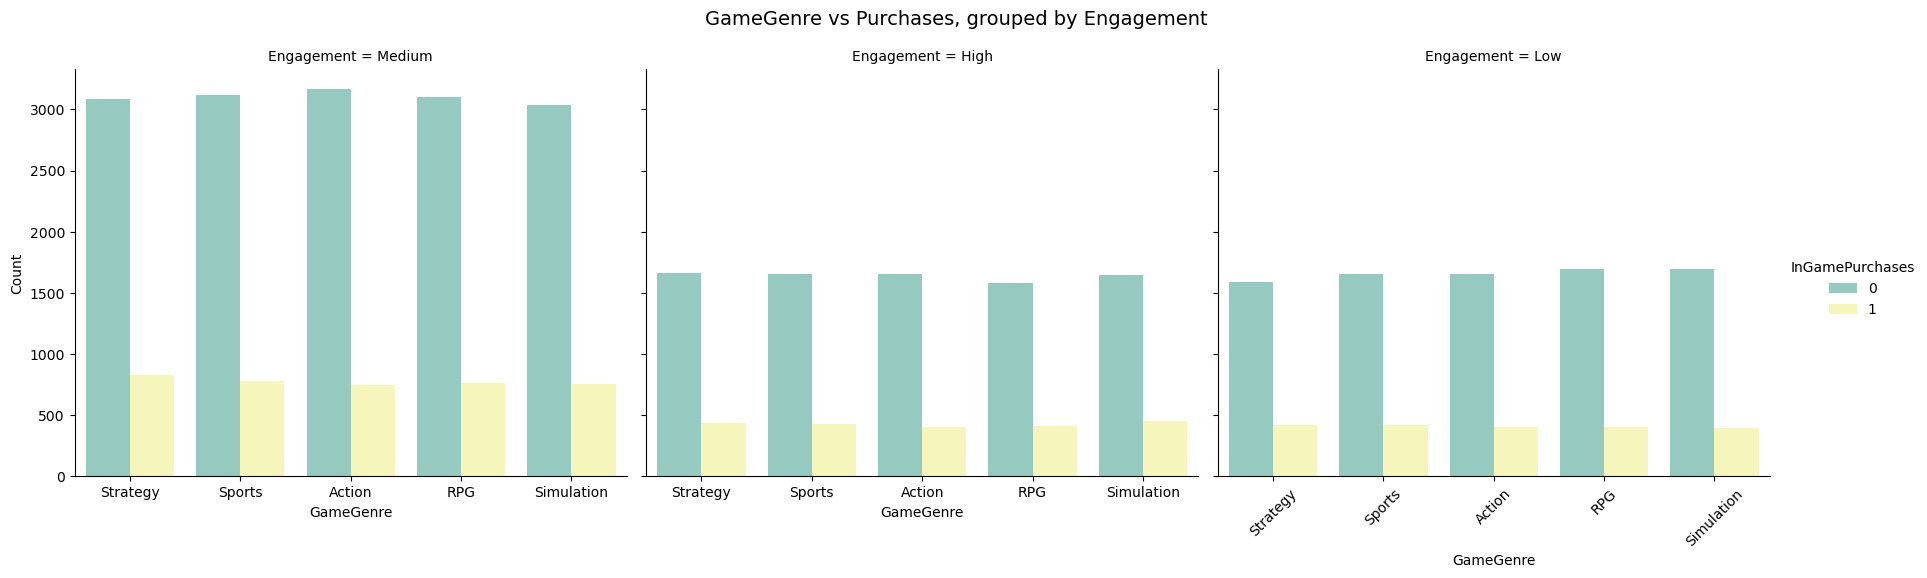

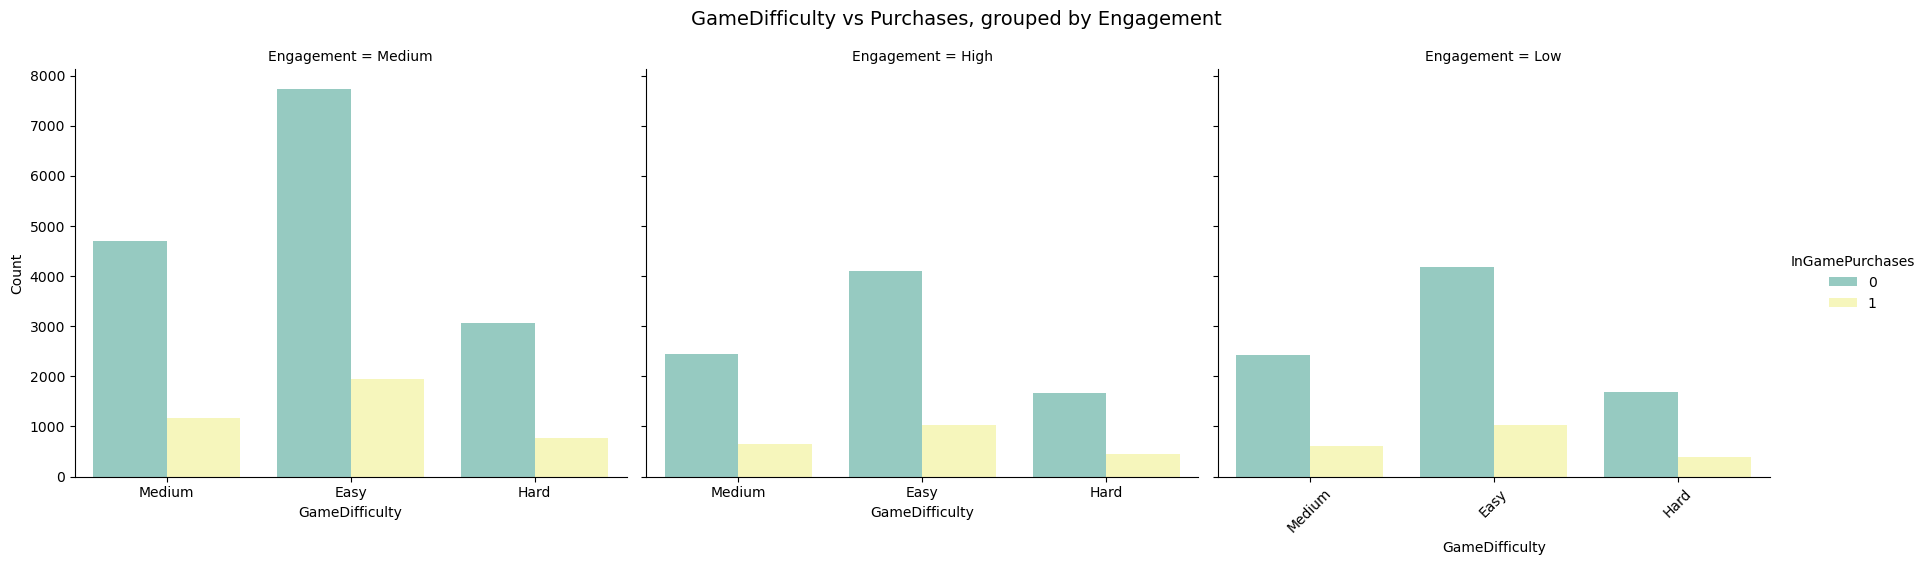

In [20]:
# Relationship between Categorical columns, InGamePurchases, and EngagementLevel

categorical_columns = ["Gender", "Location", "GameGenre", "GameDifficulty"]

for category in categorical_columns:
    g = sns.catplot(
        data=df,
        x=category,
        hue="InGamePurchases",
        col="EngagementLevel",
        kind="count",
        palette="Set3",
        height=5, 
        aspect=1.2
    )

    g.set_axis_labels(category, "Count")
    g.set_titles(col_template="Engagement = {col_name}")
    g.fig.suptitle(f"{category} vs Purchases, grouped by Engagement", fontsize=14, y=1.05)

    plt.xticks(rotation=45)
    plt.show()

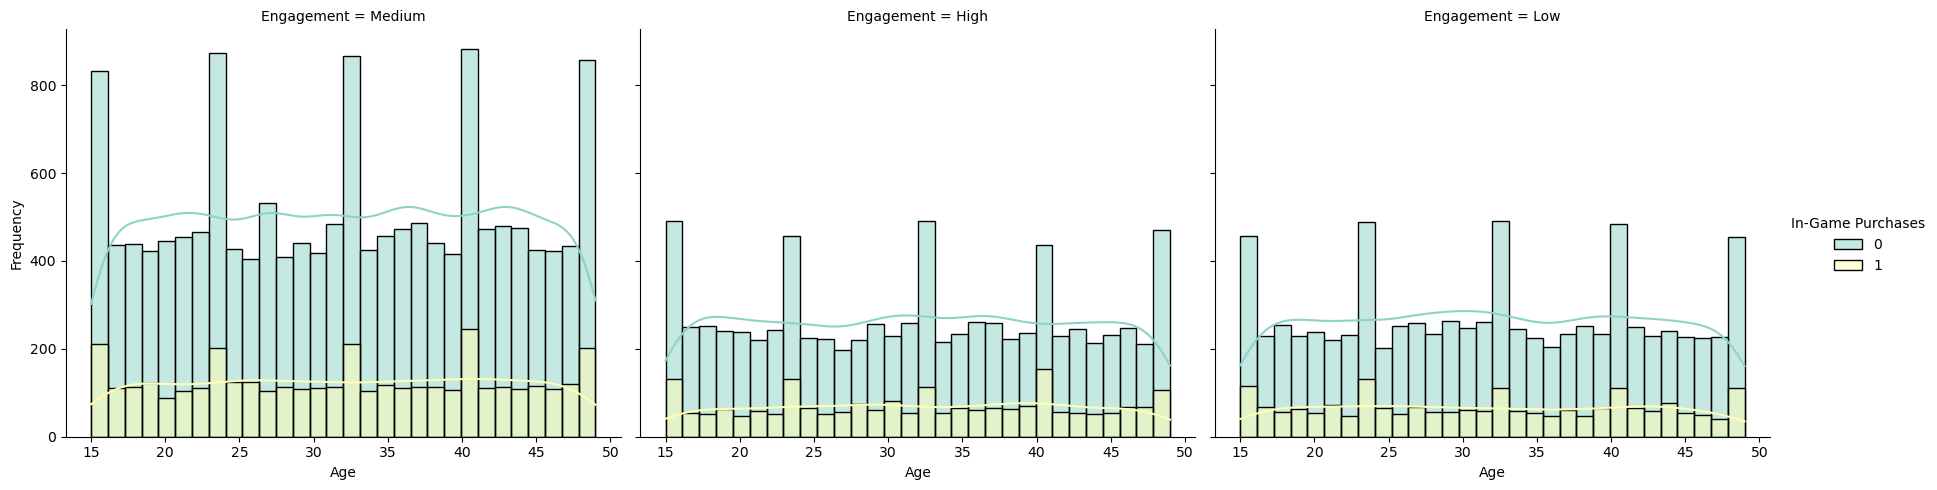

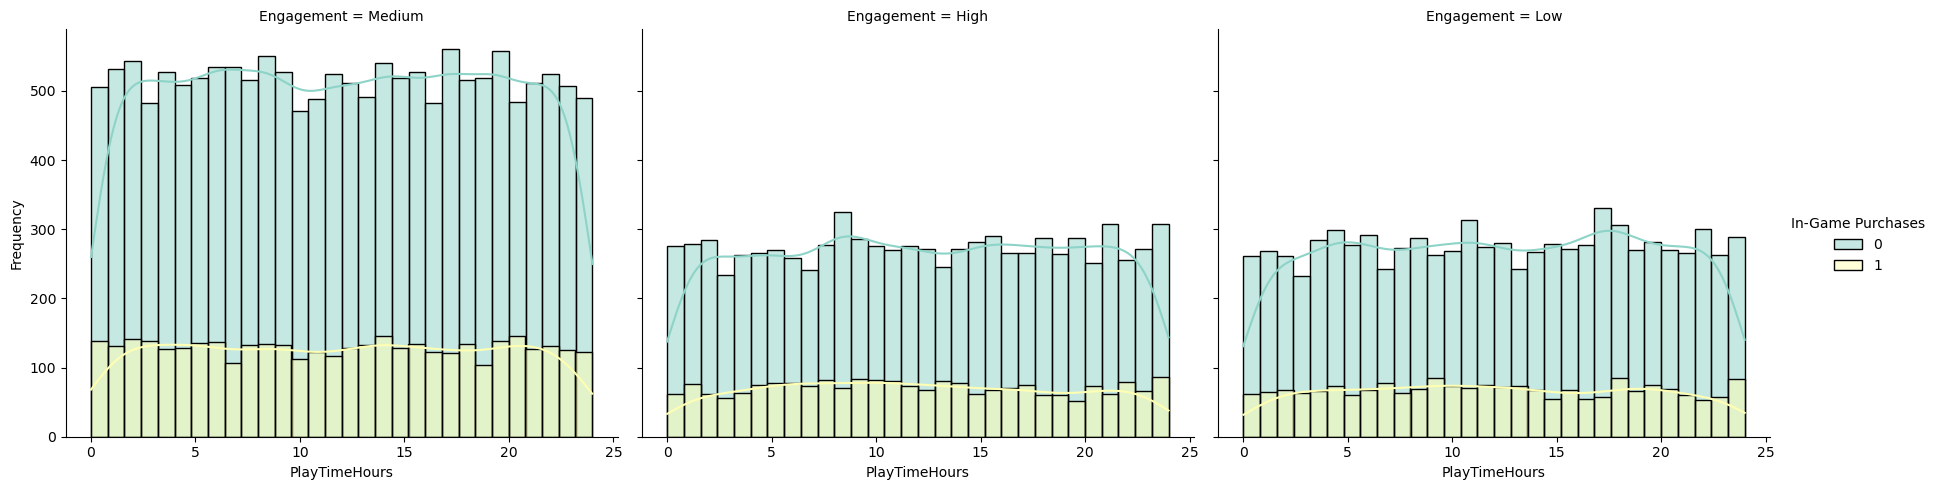

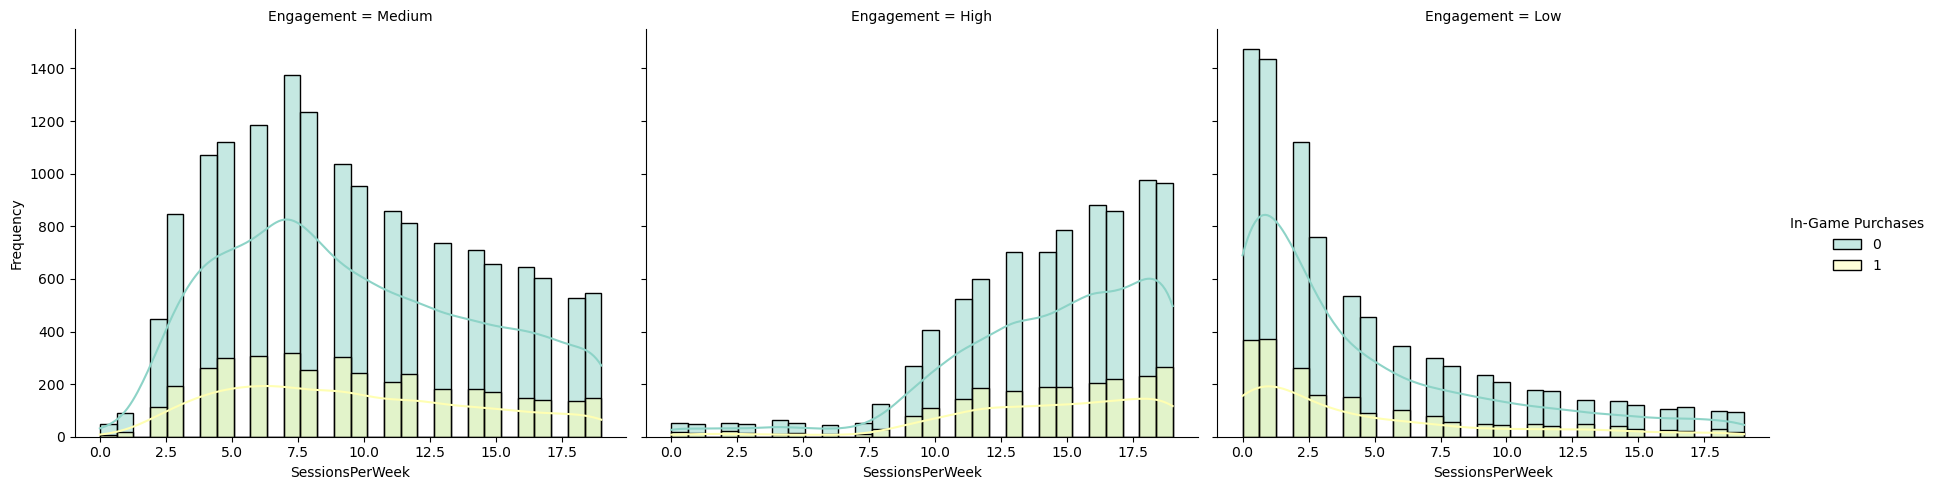

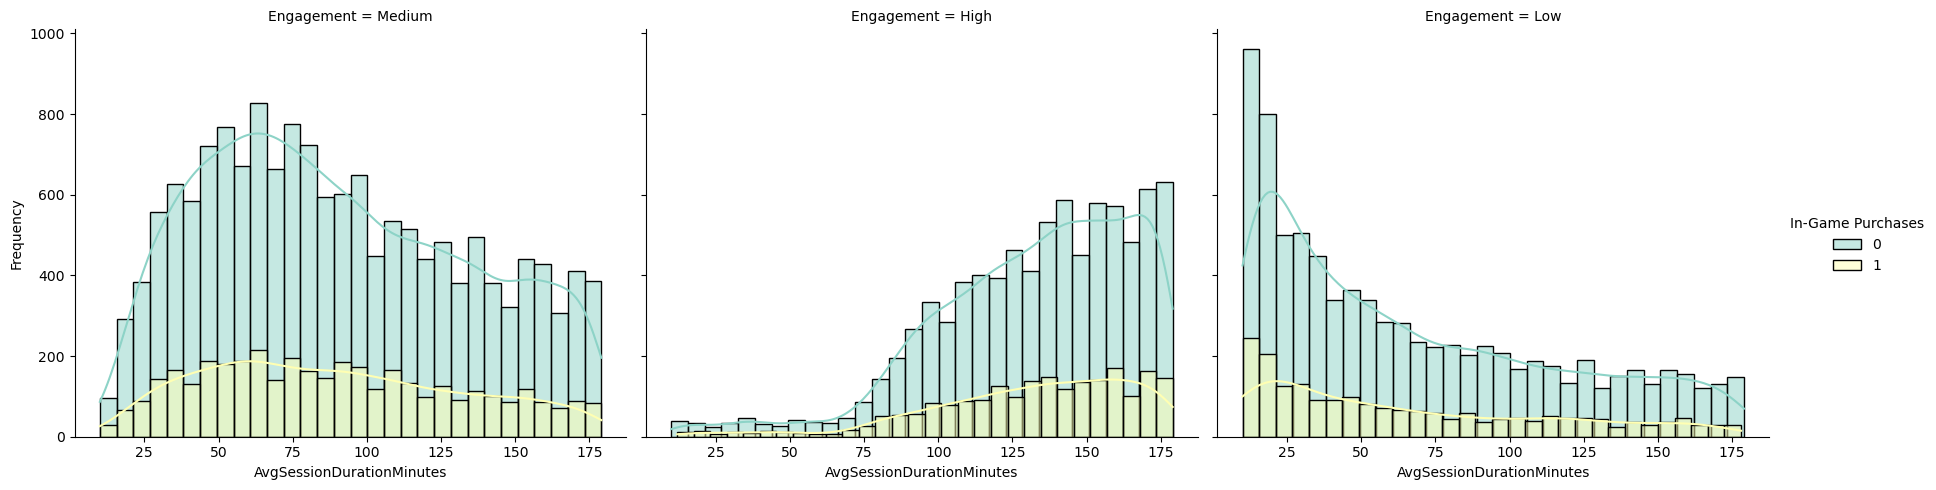

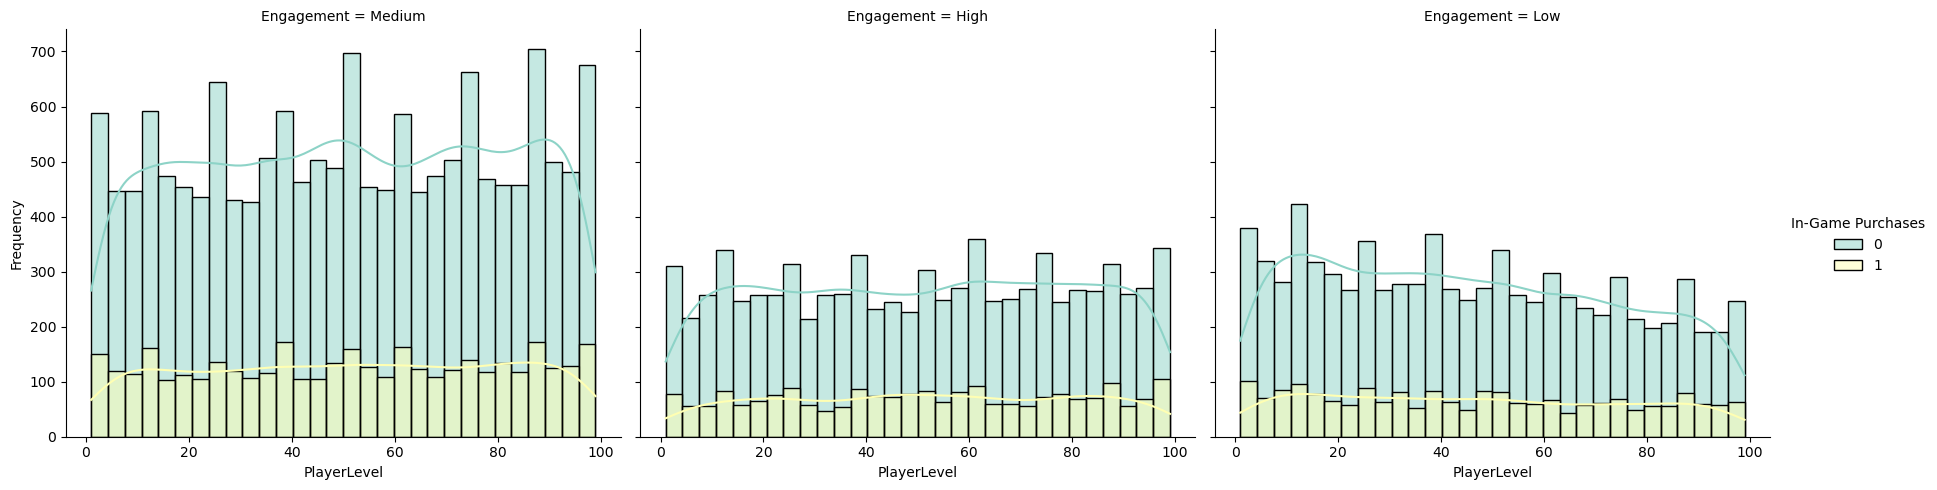

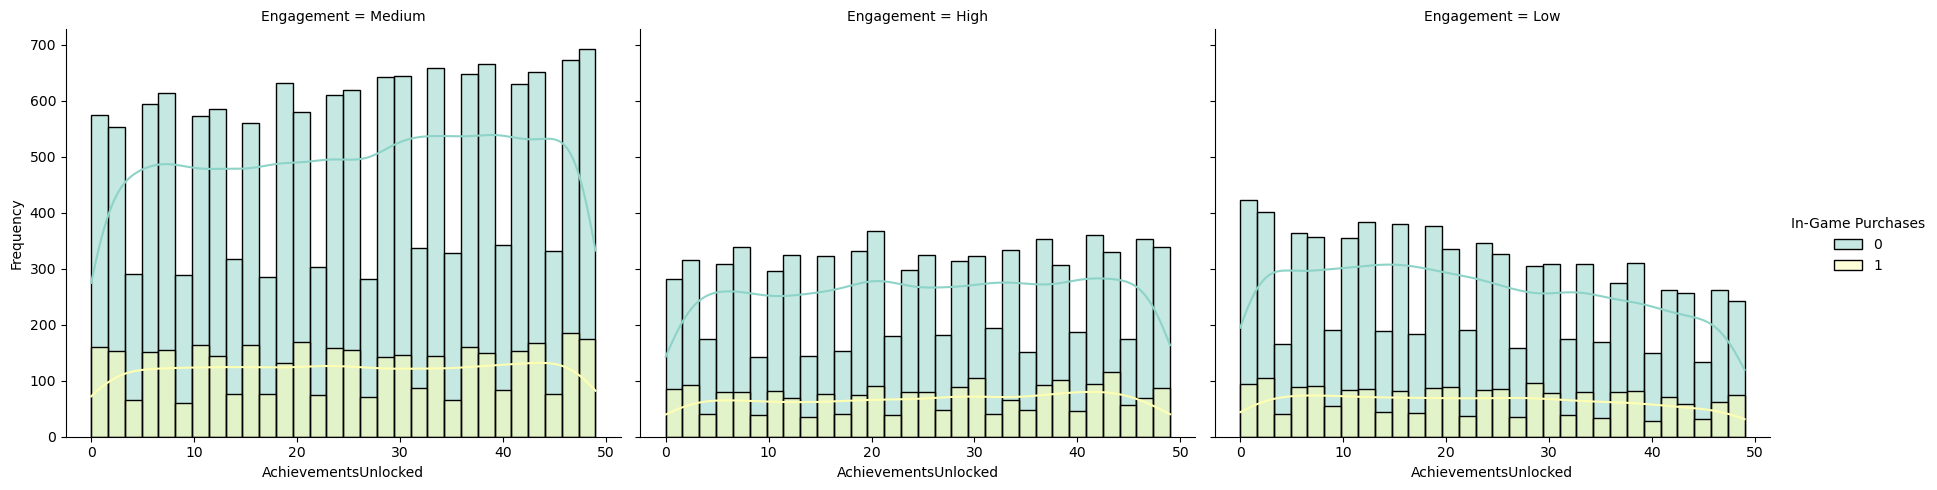

In [22]:
# Relationship between Numerical columns, InGamePurchases, and EngagementLevel

numerical_columns = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

for num_col in numerical_columns:
    g = sns.FacetGrid(df, col="EngagementLevel", hue="InGamePurchases", palette="Set3", height=5, aspect=1.2)
    g.map(sns.histplot, num_col, kde=True, bins=30)

    g.set_axis_labels(num_col, "Frequency")
    g.set_titles(col_template="Engagement = {col_name}")
    g.add_legend(title="In-Game Purchases")

    plt.show()